<a href="https://colab.research.google.com/github/pradeepfckumar/Face-Mask-Detection-using-CNN/blob/main/Face_Mask_Detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Google Colab notebook details the construction and evaluation of a Convolutional Neural Network (CNN) for face mask detection, utilizing the Kaggle "Face Mask Dataset." The project provides an end-to-end solution for identifying individuals wearing masks in images.

The initial steps involve setting up the development environment by installing the Kaggle API and configuring credentials. This enables the direct download and extraction of the dataset into the Colab workspace, preparing the image files for subsequent processing.

Data preparation is a critical phase, where images are categorized as either "with mask" or "without mask." Each image undergoes a resizing operation to a standard 128x128 pixel dimension, is converted to RGB format, and then transformed into a NumPy array. Corresponding labels (1 for "with mask," 0 for "without mask") are assigned to facilitate supervised learning. The dataset is then judiciously split into training and testing sets, and image pixel values are normalized by scaling them to a 0-1 range, which is crucial for efficient neural network training.

The core of the notebook is the development of a CNN using TensorFlow and Keras. The model architecture comprises multiple convolutional layers for robust feature extraction, interspersed with max-pooling layers to reduce spatial dimensions. A flatten layer transitions the feature maps into a 1D vector, feeding into a series of dense layers. Dropout layers are strategically integrated to mitigate overfitting, thereby enhancing the model's generalization capabilities. The final output layer employs a sigmoid activation function for binary classification.

After defining the model, it is compiled with the 'adam' optimizer and 'sparse_categorical_crossentropy' loss function, with 'accuracy' as the primary performance metric. The training process involves fitting the model to the scaled training data over several epochs, with a validation split to monitor performance continuously. The notebook concludes with a comprehensive evaluation of the model's performance on the unseen test set, reporting the overall accuracy. Visualizations illustrating training and validation loss and accuracy trends are provided to offer insights into the learning dynamics. A practical predictive system is also implemented, demonstrating how to classify new images and determine the presence or absence of a face mask.

In [ ]:
!pip install kaggle

In [ ]:
# Configuring the Path of Kaggle.Json File
!mkdir  -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 91% 148M/163M [00:00<00:00, 608MB/s] 
100% 163M/163M [00:00<00:00, 626MB/s]


In [ ]:
# Extracting the Compressed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
# Importing the Dependencies

import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_file = os.listdir('/content/data/with_mask')
print(with_mask_file[0:5])
print(with_mask_file[-5:])

['with_mask_2807.jpg', 'with_mask_2588.jpg', 'with_mask_582.jpg', 'with_mask_1285.jpg', 'with_mask_3586.jpg']
['with_mask_1857.jpg', 'with_mask_2819.jpg', 'with_mask_3497.jpg', 'with_mask_2928.jpg', 'with_mask_995.jpg']


In [ ]:
without_mask_file = os.listdir('/content/data/without_mask')
print(without_mask_file[0:5])
print(without_mask_file[-5:])

['without_mask_2782.jpg', 'without_mask_2501.jpg', 'without_mask_2191.jpg', 'without_mask_2919.jpg', 'without_mask_1623.jpg']
['without_mask_1635.jpg', 'without_mask_12.jpg', 'without_mask_2113.jpg', 'without_mask_354.jpg', 'without_mask_3101.jpg']


In [ ]:
print('Number of with mask images:', len(with_mask_file))
print('Number of without mask images:', len(without_mask_file))

Number of with mask images: 3725
Number of without mask images: 3828


In [ ]:
# Creating Labels for two class of Images
# with mask >> 1
# without mask >> 0

with_mask_labels = [1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [ ]:
labels = with_mask_labels + without_mask_labels
print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


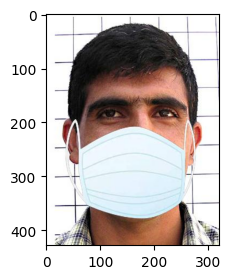

In [ ]:
# Displaying With Mask Images
# Import the matplotlib.image module
import matplotlib.image as mpimg

plt.figure(figsize=(3,3))
img = mpimg.imread('/content/data/with_mask/with_mask_1590.jpg')
imgplot = plt.imshow(img)
plt.show()

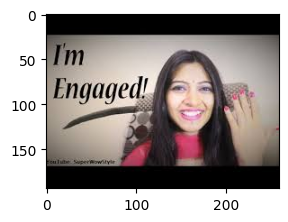

In [ ]:
# Displaying the Without Mask Image
plt.figure(figsize=(3,3))
img = mpimg.imread('/content/data/without_mask/without_mask_1590.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
# Image Processing
# Resize the Images
# Convert the Images into Numpy arrays

with_mask_path = '/content/data/with_mask/'

Data = []
image_labels = []

for img_file in with_mask_file:
    image_path = os.path.join(with_mask_path, img_file)
    image = Image.open(image_path)
    image = image.resize((128,128))
    image = image.convert('RGBA') # Convert to RGBA first to handle transparency
    image = image.convert('RGB')
    image = np.array(image)
    Data.append(image)
    image_labels.append(1) # Add label for with_mask images

without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_file:
    image_path = os.path.join(without_mask_path, img_file)
    image = Image.open(image_path)
    image = image.resize((128,128))
    image = image.convert('RGBA') # Convert to RGBA first to handle transparency
    image = image.convert('RGB')
    image = np.array(image)
    Data.append(image) # Append to the existing Data list
    image_labels.append(0) # Add label for without_mask images

In [ ]:
len(Data)

7553

In [ ]:
# So Now we have Image List in 'Data' Variable and Label of the Image in 'image_labels' Variable

X = np.array(Data)
Y = np.array(image_labels)

In [ ]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [ ]:
# Train Test Split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape,Y_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)
(7553,) (6042,) (1511,)


In [ ]:
# Scaling the Data

X_train_scaled = X_train/255
X_test_scaled = X_test/255

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 255, 255],
        [253, 255, 255],
        [254, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [252, 255, 255],
        [251, 255, 255],
        [253, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 255, 255],
        [253, 255, 255],
        [254, 255, 255]]], dtype=uint8)
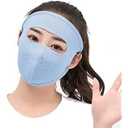

In [ ]:
X_train[0]

In [ ]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1

In [ ]:
# Building a Convolutional Neural Network (CNN)

In [ ]:
import tensorflow as tf
from tensorflow import keras

num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the Neural Network

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
# Training the Neural Network

history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 17s 52ms/step - acc: 0.7207 - loss: 0.6267 - val_acc: 0.8529 - val_loss: 0.3224
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.8736 - loss: 0.2928 - val_acc: 0.8744 - val_loss: 0.2779
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9077 - loss: 0.2531 - val_acc: 0.9058 - val_loss: 0.2194
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.9318 - loss: 0.1926 - val_acc: 0.9289 - val_loss: 0.2006
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - acc: 0.9412 - loss: 0.1587 - val_acc: 0.9273 - val_loss: 0.2099


In [ ]:
# Model Evaluation on the bases of Test Data

loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - acc: 0.9210 - loss: 0.2339
Test Accuracy = 0.9258769154548645


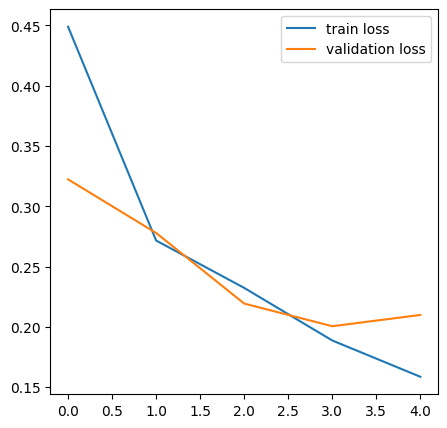

In [ ]:
h = history
# plotting the loss value
plt.figure(figsize=(5,5))
plt.plot(h.history['loss'], label = 'train loss')
plt.plot(h.history['val_loss'], label = 'validation loss')
plt.legend()
plt.show()

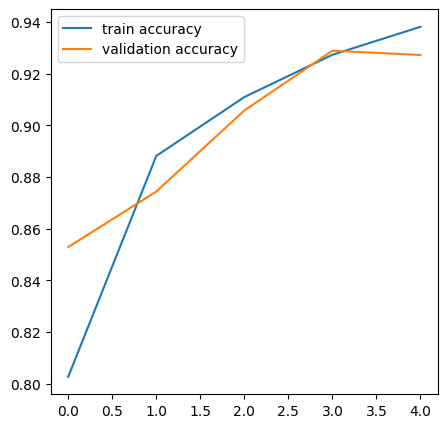

In [ ]:
# plotting the accuracy value
plt.figure(figsize=(5,5))
plt.plot(h.history['acc'], label = 'train accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()

Path/content/Test.jfif


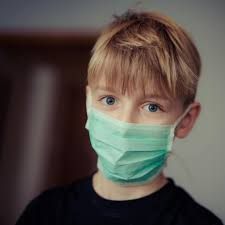

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[[0.12642929 0.7089469 ]]
1
The person in the image is wearing a mask


In [ ]:
# Predictive System

input_img_path = input('Path')
input_img = cv2.imread(input_img_path)
cv2_imshow(input_img)
input_img_resize = cv2.resize(input_img, (128,128))
input_img_scaled = input_img_resize/255
input_img_reshaped = np.reshape(input_img_scaled, [1,128,128,3])
input_prediction = model.predict(input_img_reshaped)
print(input_prediction)

input_pred_label = np.argmax(input_prediction)
print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing a mask')
else:
  print('The person in the image is not wearing a mask')